# Portfolio Analysis of Stocks

**SUMMARY:**

Financial market is variable and full of uncertain factors, which investors always wish to find a right approach either decreasing risk or increasing return. However, the core problem of optimal investment is that how investors can reasonably allocate their existing investable assets to impletment the best return under a certain risk. This is a portfolio optimization that impletment a balance between return rate and risk rate. To achieve an optimal investment, it's necessary to quantify an investment, which is as known as systematic investing, is an investment approach that uses advanced mathematical modeling, computer system and data analysis to caculate the optimal probability of a profitable trade.

# - Libraries Import

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
# import cufflinks as cf
# Keep 4 places for the decimals
pd.options.display.float_format = '{:.4f}'.format

# - Stock Data Preparation

## 1. Stocks Selection

Stocks' code: AAPL, GOOGL, FB, TSLA, AMZN

In [2]:
stocks = yf.download(['AAPL','GOOGL','FB','TSLA','AMZN']
                    ,start='2016-01-01'
                    ,end='2020-12-31')

[*********************100%***********************]  5 of 5 completed


In [3]:
stocks.head()

Adj Close                                      Close           \
                AAPL     AMZN       FB    GOOGL    TSLA    AAPL     AMZN   
Date                                                                       
2016-01-04   24.3645 636.9900 102.2200 759.4400 44.6820 26.3375 636.9900   
2016-01-05   23.7540 633.7900 102.7300 761.5300 44.6860 25.6775 633.7900   
2016-01-06   23.2891 632.6500 102.9700 759.3300 43.8080 25.1750 632.6500   
2016-01-07   22.3062 607.9400  97.9200 741.0000 43.1300 24.1125 607.9400   
2016-01-08   22.4242 607.0500  97.3300 730.9100 42.2000 24.2400 607.0500   

                                      ...    Open                             \
                 FB    GOOGL    TSLA  ...    AAPL     AMZN       FB    GOOGL   
Date                                  ...                                      
2016-01-04 102.2200 759.4400 44.6820  ... 25.6525 656.2900 101.9500 762.2000   
2016-01-05 102.7300 761.5300 44.6860  ... 26.4375 646.8600 102.8900 764.1000   
2016-01-06 102.9700 759.3300 43.8080  ... 25.1400 622.0000 101.1300 750.3700   
2016-01-07  97.9200 741.0000 43.1300  ... 24.6700 621.8000 100.5000 746.4900   
2016-01-08  97.3300 730.9100 42.2000  ... 24.6375 619.6600  99.8800 747.8000   

                       Volume                                        
              TSLA       AAPL     AMZN        FB    GOOGL      TSLA  
Date                                                                 
2016-01-04 46.1440  270597600  9314500  37912400  3369100  34135500  
2016-01-05 45.2720  223164000  5822600  23258200  2260800  15934000  
2016-01-06 44.0000  273829600  5329200  25096200  2410300  18895500  
2016-01-07 42.8380  324377600  7074900  45172900  3156600  17771500  
2016-01-08 43.5720  283192000  5512900  35402300  2375300  18140500  

[5 rows x 30 columns]

In [4]:
stocks.tail()

Adj Close                                          Close            \
                AAPL      AMZN       FB     GOOGL     TSLA     AAPL      AMZN   
Date                                                                            
2020-12-23  130.7646 3185.2700 268.1100 1728.2300 645.9800 130.9600 3185.2700   
2020-12-24  131.7731 3172.6899 267.4000 1734.1600 661.7700 131.9700 3172.6899   
2020-12-28  136.4861 3283.9600 277.0000 1773.9600 663.6900 136.6900 3283.9600   
2020-12-29  134.6688 3322.0000 276.7800 1757.7600 665.9900 134.8700 3322.0000   
2020-12-30  133.5205 3285.8501 271.8700 1736.2500 694.7800 133.7200 3285.8501   

                                        ...     Open                     \
                 FB     GOOGL     TSLA  ...     AAPL      AMZN       FB   
Date                                    ...                               
2020-12-23 268.1100 1728.2300 645.9800  ... 132.1600 3205.0000 266.8900   
2020-12-24 267.4000 1734.1600 661.7700  ... 131.3200 3193.8999 268.8800   
2020-12-28 277.0000 1773.9600 663.6900  ... 133.9900 3194.0000 268.7400   
2020-12-29 276.7800 1757.7600 665.9900  ... 138.0500 3309.9399 276.9500   
2020-12-30 271.8700 1736.2500 694.7800  ... 135.5800 3341.0000 277.9500   

                                  Volume                                        
               GOOGL     TSLA       AAPL     AMZN        FB    GOOGL      TSLA  
Date                                                                            
2020-12-23 1723.9301 632.2000   88223700  2093800  14329000  1148700  33173000  
2020-12-24 1729.0000 642.9900   54930100  1451900   6702000   465600  22865600  
2020-12-28 1744.9100 674.5100  124486200  5686800  23299700  1382500  32278600  
2020-12-29 1787.2300 661.0000  121047300  4872900  16383000   986300  22910800  
2020-12-30 1765.0000 672.0000   96452100  3209300  11803800  1051300  42846000  

[5 rows x 30 columns]

In [5]:
stocks.shape

(1258, 30)

In [6]:
stocks.to_csv("stocks.csv")

In [7]:
stocks['Volume']['AAPL'][-1:]

Date
2020-12-30    96452100
Name: AAPL, dtype: int64

## 2. Get the Closing Prices of Each Stock

In [8]:
stocks = stocks['Adj Close'].copy()

In [9]:
stocks.head()

,AAPL,AMZN,FB,GOOGL,TSLA
Date,,,,,
2016-01-04,24.3645,636.9900,102.2200,759.4400,44.6820
2016-01-05,23.7540,633.7900,102.7300,761.5300,44.6860
2016-01-06,23.2891,632.6500,102.9700,759.3300,43.8080
2016-01-07,22.3062,607.9400,97.9200,741.0000,43.1300
2016-01-08,22.4242,607.0500,97.3300,730.9100,42.2000


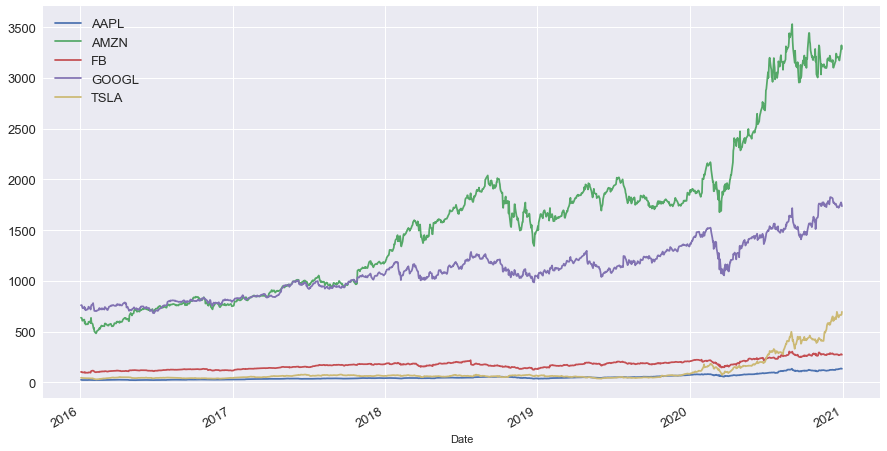

In [10]:
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13);

In [11]:
normalization = stocks / stocks.iloc[0]
normalization.head()

,AAPL,AMZN,FB,GOOGL,TSLA
Date,,,,,
2016-01-04,1.0000,1.0000,1.0000,1.0000,1.0000
2016-01-05,0.9749,0.9950,1.0050,1.0028,1.0001
2016-01-06,0.9559,0.9932,1.0073,0.9999,0.9804
2016-01-07,0.9155,0.9544,0.9579,0.9757,0.9653
2016-01-08,0.9204,0.9530,0.9522,0.9624,0.9445


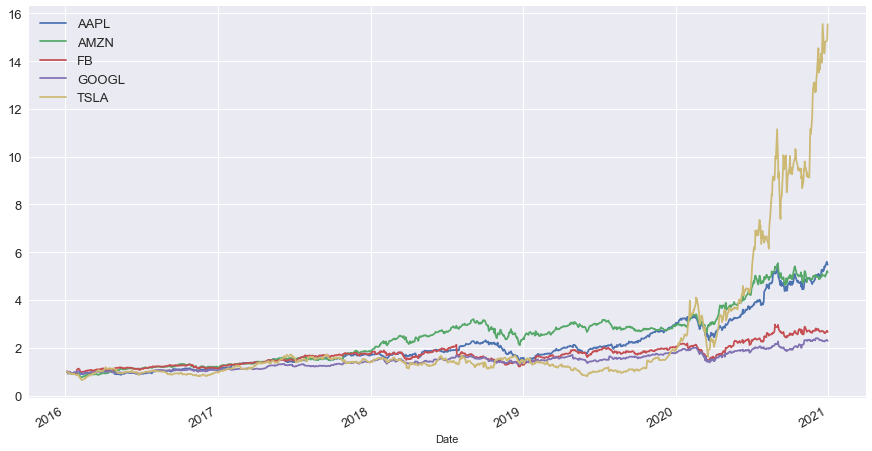

In [12]:
normalization.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13);

## 3. Daily Return Rate of Stocks

In [13]:
# calculate daily return rate and drop NAN values
daily_return = stocks.pct_change().dropna()
daily_return.head()

,AAPL,AMZN,FB,GOOGL,TSLA
Date,,,,,
2016-01-05,-0.0251,-0.0050,0.0050,0.0028,0.0001
2016-01-06,-0.0196,-0.0018,0.0023,-0.0029,-0.0196
2016-01-07,-0.0422,-0.0391,-0.0490,-0.0241,-0.0155
2016-01-08,0.0053,-0.0015,-0.0060,-0.0136,-0.0216
2016-01-11,0.0162,0.0176,0.0018,0.0030,-0.0149


# - Portfolio Return & Risk Caculation

In these five stocks, how do we assign our fund? It will need to set up the corresponding weights for the stocks. There are three different schemes of weight allocation.

## 1. Price-weighted Portfolio

- The weight bases on the percentage of the price of a stock in the total price of five stocks.

In [14]:
sum_each_row = stocks.sum(axis = 1)

In [15]:
# see how many percentage each stock in the total price daily
weights_pw = stocks.div(sum_each_row, axis = 0)
weights_pw.head()

,AAPL,AMZN,FB,GOOGL,TSLA
Date,,,,,
2016-01-04,0.0155,0.4063,0.0652,0.4844,0.0285
2016-01-05,0.0152,0.4046,0.0656,0.4861,0.0285
2016-01-06,0.0149,0.4050,0.0659,0.4861,0.0280
2016-01-07,0.0147,0.4020,0.0647,0.4900,0.0285
2016-01-08,0.0150,0.4047,0.0649,0.4873,0.0281


In [16]:
daily_return_w = daily_return.copy()

daily_return_w['PRICE_W'] = daily_return.mul(weights_pw, axis=1).sum(axis=1)
daily_return_w.head()

,AAPL,AMZN,FB,GOOGL,TSLA,PRICE_W
Date,,,,,,
2016-01-05,-0.0251,-0.0050,0.0050,0.0028,0.0001,-0.0007
2016-01-06,-0.0196,-0.0018,0.0023,-0.0029,-0.0196,-0.0028
2016-01-07,-0.0422,-0.0391,-0.0490,-0.0241,-0.0155,-0.0318
2016-01-08,0.0053,-0.0015,-0.0060,-0.0136,-0.0216,-0.0081
2016-01-11,0.0162,0.0176,0.0018,0.0030,-0.0149,0.0086


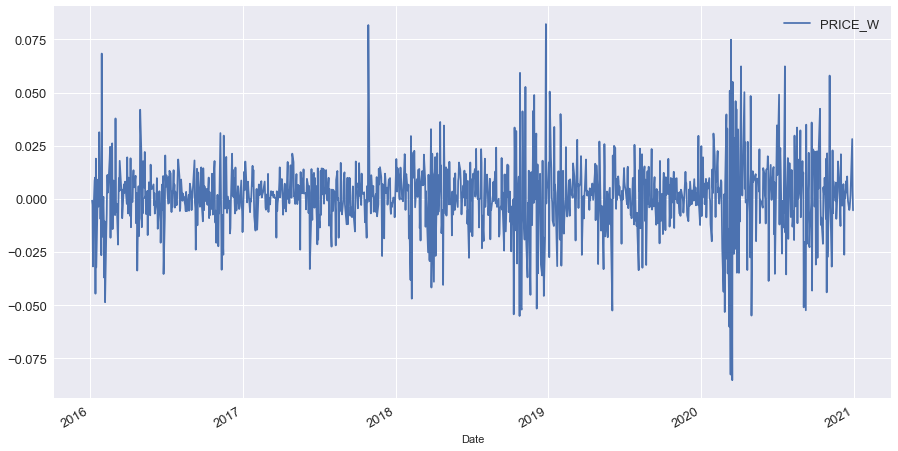

In [17]:
daily_return_w['PRICE_W'].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13);

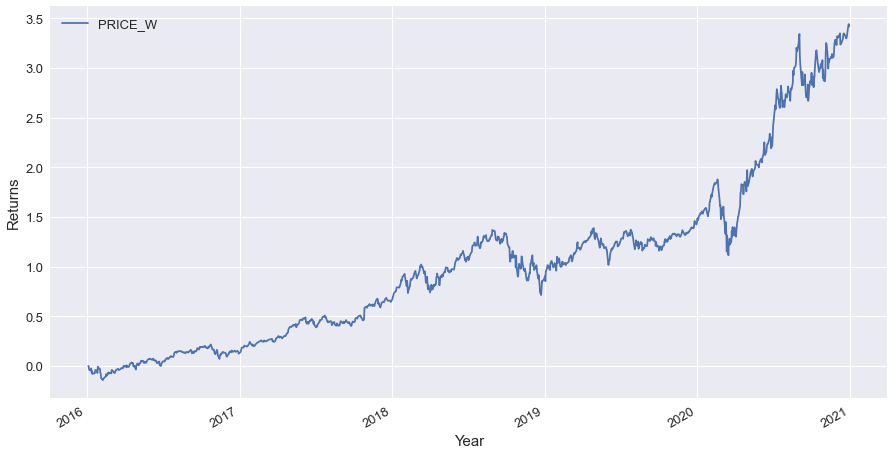

In [18]:
# dinfe cumulative return function and plot the return of given weights portfolio
def cumulative_returns_plot(weights_list):
    for weight in weights_list:
        cumulative_returns = ((1+daily_return_w[weight]).cumprod()-1)
        cumulative_returns.plot(figsize = (15, 8), fontsize = 13)
        plt.xlabel('Year', fontsize = 15)
        plt.ylabel('Returns', fontsize = 15)
        plt.legend(fontsize = 13);
        
cumulative_returns_plot(['PRICE_W'])

## 2. Equal-weighted Portfolio

- The weight for each stock is equal.

In [19]:
num_stocks = len(stocks.columns)

In [20]:
weights_ew = [1 / num_stocks for i in range(num_stocks)]

In [21]:
# A.mul(B, axis=1).sum(axis=1) == A.dot(B)
daily_return_w['EQUAL_W'] = daily_return_w[['AAPL','AMZN','FB','GOOGL','TSLA']].mul(weights_ew, axis=1).sum(axis=1)
daily_return_w.head()

,AAPL,AMZN,FB,GOOGL,TSLA,PRICE_W,EQUAL_W
Date,,,,,,,
2016-01-05,-0.0251,-0.0050,0.0050,0.0028,0.0001,-0.0007,-0.0045
2016-01-06,-0.0196,-0.0018,0.0023,-0.0029,-0.0196,-0.0028,-0.0083
2016-01-07,-0.0422,-0.0391,-0.0490,-0.0241,-0.0155,-0.0318,-0.0340
2016-01-08,0.0053,-0.0015,-0.0060,-0.0136,-0.0216,-0.0081,-0.0075
2016-01-11,0.0162,0.0176,0.0018,0.0030,-0.0149,0.0086,0.0047


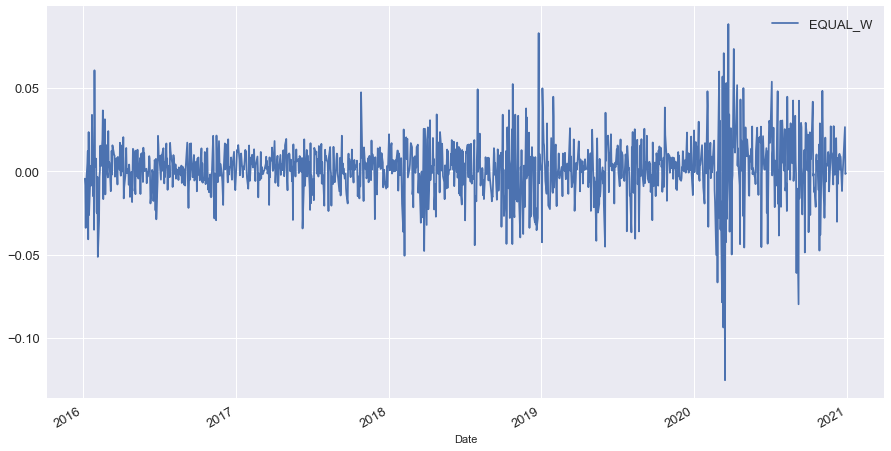

In [22]:
daily_return_w['EQUAL_W'].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13);

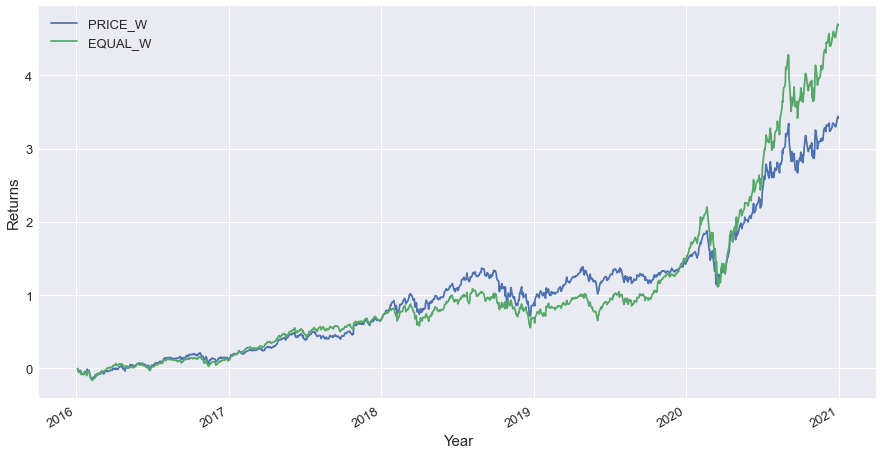

In [23]:
cumulative_returns_plot(['PRICE_W', 'EQUAL_W'])

## 3. Value-weighted Portfolio

- The weight bases on market value of a stock.

AAPL - last_price: 133.5205, market_cap: 2264520000000

AMZN - last_price: 3285.850, market_cap: 1642930000000

FB - last_price: 271.8700, market_cap: 775100000000

GOOGL - last_price: 1736.2500, market_cap: 1182070000000

TSLA - last_price: 694.7800, market_cap: 648230000000

From: https://www.macrotrends.net/

In [24]:
data = {'last_price':[133.5205, 3285.850, 271.8700, 1736.2500, 694.7800]
       ,'market_cap':[2264520000000, 2264520000000, 775100000000, 1182070000000, 1182070000000]}

stocks_value = pd.DataFrame(data=data, index=['AAPL','AMZN','FB','GOOGL','TSLA'])
stocks_value

,last_price,market_cap
AAPL,133.5205,2264520000000
AMZN,3285.8500,2264520000000
FB,271.8700,775100000000
GOOGL,1736.2500,1182070000000
TSLA,694.7800,1182070000000


In [25]:
# calculate shares amounts of each
stocks_value['shares'] = stocks_value['market_cap'] // stocks_value['last_price']
stocks_value

,last_price,market_cap,shares
AAPL,133.5205,2264520000000,16960092270.0000
AMZN,3285.8500,2264520000000,689173273.0000
FB,271.8700,775100000000,2850994960.0000
GOOGL,1736.2500,1182070000000,680817854.0000
TSLA,694.7800,1182070000000,1701358703.0000


In [26]:
# calculate stocks' market cap
mcap = stocks * stocks_value['shares']
mcap.head()

,AAPL,AMZN,FB,GOOGL,TSLA
Date,,,,,
2016-01-04,413224783516.1537,438996476438.0623,291428708291.4185,517040312703.9130,76020108217.4910
2016-01-05,402869638678.8554,436791113551.7026,292882721811.4008,518463240302.4556,76026916404.1344
2016-01-06,394985554648.4434,436005487988.9694,293566954511.4185,516965432712.8907,74533119776.4847
2016-01-07,378315340054.1321,418976001270.1719,279169421262.8723,504486029814.0000,73379602677.6371
2016-01-08,380315725692.9265,418362626961.8903,277487344677.1277,497616559383.4574,71797338564.6337


In [27]:
mcap.tail()

,AAPL,AMZN,FB,GOOGL,TSLA
Date,,,,,
2020-12-23,2217779726782.7002,2195202964749.1255,764380216962.9785,1176609826521.1963,1099043661734.2778
2020-12-24,2234883706554.2583,2186533111133.1235,762356034902.9077,1180647112962.7815,1125908182113.9722
2020-12-28,2314816060365.0283,2263217434680.2490,789725603920.0000,1207743613687.3926,1129174761747.7778
2020-12-29,2283994632917.9390,2289433612906.0000,789098381548.5815,1196714397695.6519,1133087865996.1389
2020-12-30,2264519614856.3149,2264520066389.1274,775099985854.3262,1182069999007.5000,1182070049514.8333


In [28]:
# daily sum for 5 stocks
daily_sum = mcap.sum(axis=1)
daily_sum.head()

Date
2016-01-04   1736710389167.0383
2016-01-05   1727033630748.5486
2016-01-06   1716056549638.2063
2016-01-07   1654326395078.8135
2016-01-08   1645579595280.0356
dtype: float64

In [29]:
weights_vw = mcap.div(daily_sum, axis=0)
weights_vw.head()

,AAPL,AMZN,FB,GOOGL,TSLA
Date,,,,,
2016-01-04,0.2379,0.2528,0.1678,0.2977,0.0438
2016-01-05,0.2333,0.2529,0.1696,0.3002,0.0440
2016-01-06,0.2302,0.2541,0.1711,0.3013,0.0434
2016-01-07,0.2287,0.2533,0.1688,0.3049,0.0444
2016-01-08,0.2311,0.2542,0.1686,0.3024,0.0436


In [30]:
daily_return_w['VALUE_W'] = daily_return_w.mul(weights_vw, axis=1).sum(axis=1)
daily_return_w.head()

,AAPL,AMZN,FB,GOOGL,TSLA,PRICE_W,EQUAL_W,VALUE_W
Date,,,,,,,,
2016-01-05,-0.0251,-0.0050,0.0050,0.0028,0.0001,-0.0007,-0.0045,-0.0054
2016-01-06,-0.0196,-0.0018,0.0023,-0.0029,-0.0196,-0.0028,-0.0083,-0.0063
2016-01-07,-0.0422,-0.0391,-0.0490,-0.0241,-0.0155,-0.0318,-0.0340,-0.0359
2016-01-08,0.0053,-0.0015,-0.0060,-0.0136,-0.0216,-0.0081,-0.0075,-0.0052
2016-01-11,0.0162,0.0176,0.0018,0.0030,-0.0149,0.0086,0.0047,0.0088


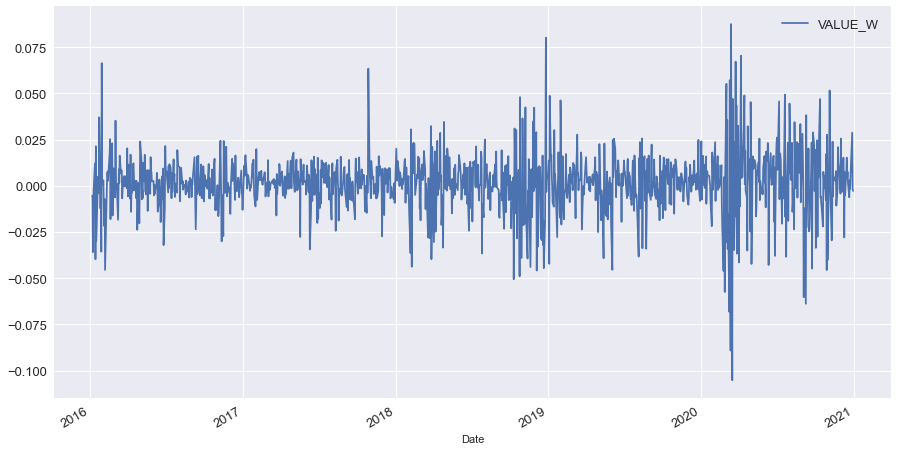

In [31]:
daily_return_w['VALUE_W'].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13);

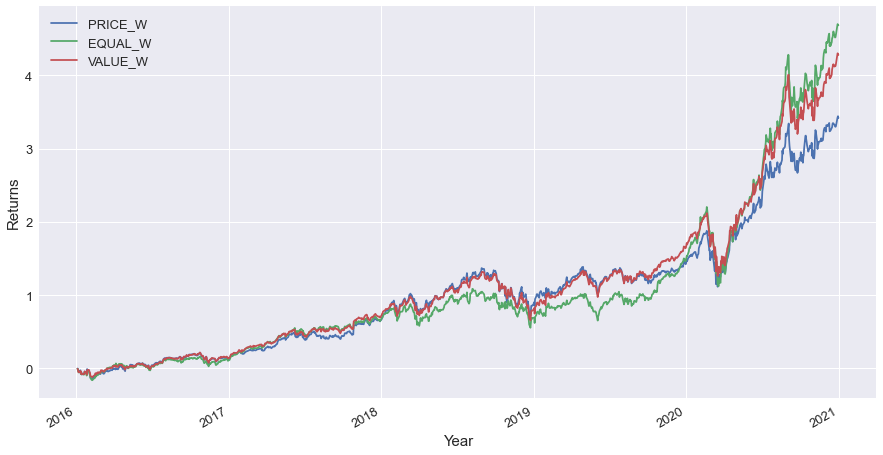

In [32]:
cumulative_returns_plot(['PRICE_W', 'EQUAL_W', 'VALUE_W'])

In fact, we need to determine the optimal portfolio base on a ultimate accumulation of profit. After comparing these three approaches of portfolio, we can see that the Equal-weighted portfolio is the best portfolio, but not obvious.

# - Correlation Analysis of Portfolios

## 1. Correlation Matrix of Portfolio

Correlation matrix is used to estimate the linear relationship of return and risk between of multi-stocks.

In [33]:
correlation_maxtrix = daily_return.corr()
correlation_maxtrix

,AAPL,AMZN,FB,GOOGL,TSLA
AAPL,1.0000,0.5961,0.5807,0.6555,0.3854
AMZN,0.5961,1.0000,0.6233,0.6635,0.3645
FB,0.5807,0.6233,1.0000,0.6932,0.3240
GOOGL,0.6555,0.6635,0.6932,1.0000,0.3632
TSLA,0.3854,0.3645,0.3240,0.3632,1.0000


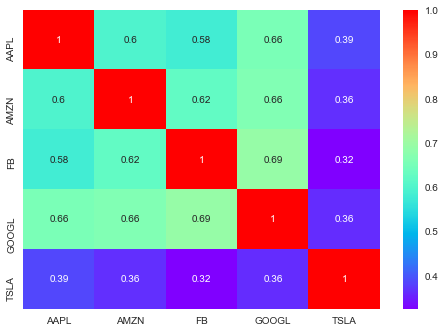

In [34]:
sns.heatmap(correlation_maxtrix, annot=True, cmap='rainbow');

## 2. Covariance Matrix of Portfolio

Covariance can tell us the fluctuation of a stock.

In [35]:
# daily covariance
covariance = daily_return.cov()
covariance

,AAPL,AMZN,FB,GOOGL,TSLA
AAPL,0.0004,0.0002,0.0002,0.0002,0.0003
AMZN,0.0002,0.0004,0.0002,0.0002,0.0003
FB,0.0002,0.0002,0.0004,0.0002,0.0002
GOOGL,0.0002,0.0002,0.0002,0.0003,0.0002
TSLA,0.0003,0.0003,0.0002,0.0002,0.0013


In [36]:
# year covariance
covariance_year = covariance * 252
covariance_year

,AAPL,AMZN,FB,GOOGL,TSLA
AAPL,0.0911,0.0546,0.0578,0.0521,0.0672
AMZN,0.0546,0.0920,0.0623,0.0530,0.0639
FB,0.0578,0.0623,0.1086,0.0602,0.0617
GOOGL,0.0521,0.0530,0.0602,0.0694,0.0553
TSLA,0.0672,0.0639,0.0617,0.0553,0.3341


## 3. Standard Deviation / Mean of Portfolio

Standard deviation can measure the risk, mean can measure the return.

In [37]:
# portfolio's return rate (mean) and risk rate (standard deviation) under equal-weights
return_and_risk = daily_return_w[['AAPL','AMZN','FB','GOOGL','TSLA','EQUAL_W']].agg(['mean', 'std']).T
return_and_risk

,mean,std
AAPL,0.0015,0.0190
AMZN,0.0015,0.0191
FB,0.0010,0.0208
GOOGL,0.0008,0.0166
TSLA,0.0028,0.0364
EQUAL_W,0.0015,0.0172


In [38]:
# year return rate and risk rate
return_and_risk.columns = ['Return', 'Risk']
return_and_risk['Return'] = return_and_risk['Return'] * 252
return_and_risk['Risk'] = return_and_risk['Risk'] * np.sqrt(252)
return_and_risk

,Return,Risk
AAPL,0.3869,0.3019
AMZN,0.3749,0.3033
FB,0.2508,0.3296
GOOGL,0.2006,0.2635
TSLA,0.7173,0.5781
EQUAL_W,0.3861,0.2736


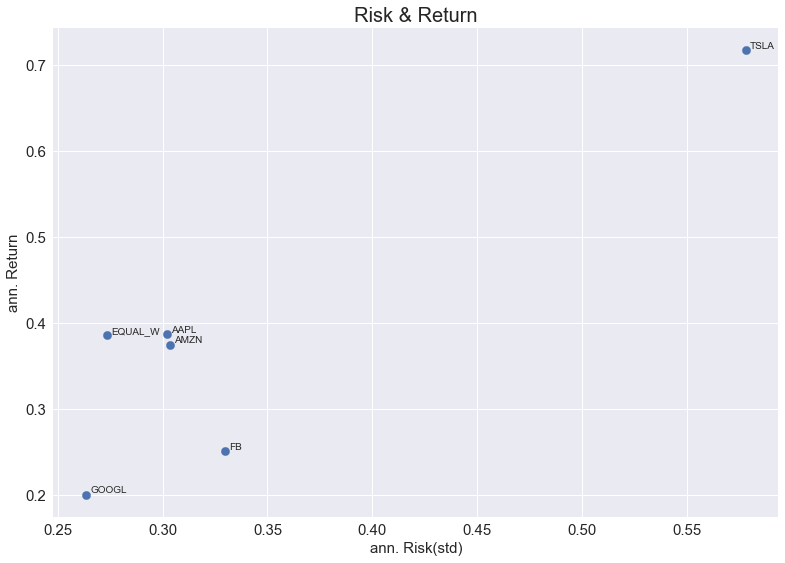

In [39]:
return_and_risk.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 70, fontsize = 15)
for i in return_and_risk.index:
    plt.annotate(i, xy=(return_and_risk.loc[i, "Risk"]+0.002, return_and_risk.loc[i, "Return"]+0.002), size = 10)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk & Return", fontsize = 20);

# - Exploratory Optimal Portfolio of Stocks

What is a best selection of the combination weights? Maxmal profit or minimum risk? We need to trade-off thses two factors.

## 1. Using Markov Chain Monte Carlo (MCMC) Simulations

Using Monte Carlo Simulations to conduct analysis for generating a set of weights randomly, and calculating the profit(mean) and risk(standard deviation) in this combination weights, then repeat many times of this process (like 10000). Finally, plot each combination of return and risk as a scatter diagram.

In [40]:
# set up a simulation of portfolio number
simulation_num = 10000
# stocks number
stock_num = len(stocks.columns)

# set up a seed for the repeated outcomes
np.random.seed(123)
simulation_matrix = np.random.random(simulation_num * stock_num).reshape(simulation_num, stock_num)
simulation_matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897],
       [0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426],
       ...,
       [0.1431774 , 0.93921308, 0.85752172, 0.89741816, 0.59365226],
       [0.09741402, 0.87003421, 0.10807345, 0.52530678, 0.16743252],
       [0.16184375, 0.53825669, 0.13871246, 0.50115336, 0.0681388 ]])

In [41]:
simulation_matrix.shape

(10000, 5)

In [42]:
# calculate weights
weights = simulation_matrix / simulation_matrix.sum(axis=1, keepdims= True)
weights

array([[0.28080675, 0.11536743, 0.09146337, 0.2222825 , 0.29007995],
       [0.14285692, 0.3311435 , 0.23122471, 0.162381  , 0.13239387],
       [0.17433282, 0.37035383, 0.22279264, 0.03031609, 0.20220461],
       ...,
       [0.04173073, 0.27374463, 0.24993473, 0.26156302, 0.17302689],
       [0.0550903 , 0.49202817, 0.06111849, 0.29707537, 0.09468767],
       [0.11493727, 0.38225606, 0.09851002, 0.35590623, 0.04839042]])

In [43]:
# the sum of each row is equal 1
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [44]:
sim_daily_return = daily_return.dot(weights.T)
sim_daily_return

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.0065,-0.0036,-0.0050,-0.0079,-0.0042,-0.0043,-0.0005,-0.0009,-0.0057,-0.0008,...,-0.0082,-0.0002,-0.0077,-0.0097,-0.0067,-0.0000,-0.0029,-0.0004,-0.0027,-0.0033
2016-01-06,-0.0118,-0.0059,-0.0076,-0.0122,-0.0080,-0.0107,-0.0061,-0.0056,-0.0128,-0.0060,...,-0.0062,-0.0060,-0.0119,-0.0121,-0.0127,-0.0041,-0.0091,-0.0049,-0.0045,-0.0047
2016-01-07,-0.0307,-0.0363,-0.0366,-0.0315,-0.0343,-0.0304,-0.0322,-0.0339,-0.0299,-0.0350,...,-0.0426,-0.0300,-0.0312,-0.0344,-0.0295,-0.0320,-0.0293,-0.0337,-0.0332,-0.0340
2016-01-08,-0.0085,-0.0062,-0.0057,-0.0075,-0.0074,-0.0097,-0.0099,-0.0091,-0.0099,-0.0090,...,-0.0009,-0.0107,-0.0073,-0.0052,-0.0090,-0.0093,-0.0102,-0.0090,-0.0069,-0.0064
2016-01-11,0.0031,0.0071,0.0068,0.0042,0.0050,0.0019,0.0027,0.0031,0.0004,0.0024,...,0.0123,0.0032,0.0052,0.0064,0.0027,0.0052,0.0027,0.0041,0.0091,0.0091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.0012,-0.0004,-0.0009,0.0007,0.0005,0.0017,0.0022,0.0023,0.0024,0.0023,...,-0.0035,0.0020,-0.0002,-0.0005,0.0011,0.0014,0.0016,0.0016,-0.0012,-0.0009
2020-12-24,0.0093,0.0030,0.0043,0.0090,0.0055,0.0092,0.0053,0.0045,0.0112,0.0050,...,0.0003,0.0054,0.0085,0.0076,0.0103,0.0029,0.0079,0.0037,0.0017,0.0015
2020-12-28,0.0233,0.0291,0.0285,0.0245,0.0267,0.0223,0.0248,0.0264,0.0213,0.0263,...,0.0352,0.0237,0.0244,0.0273,0.0220,0.0265,0.0224,0.0266,0.0285,0.0294


In [45]:
# portfolio's return rate (mean) and risk rate (standard deviation) under equal-weights
sim_return_and_risk = sim_daily_return.agg(['mean', 'std']).T
sim_return_and_risk

,mean,std
0,0.0017,0.0185
1,0.0014,0.0168
2,0.0016,0.0178
3,0.0016,0.0178
4,0.0016,0.0173
...,...,...
9995,0.0013,0.0165
9996,0.0017,0.0187
9997,0.0014,0.0171
9998,0.0014,0.0166


In [46]:
# year return rate and risk rate
sim_return_and_risk.columns = ['Return', 'Risk']
sim_return_and_risk['Return'] = sim_return_and_risk['Return'] * 252
sim_return_and_risk['Risk'] = sim_return_and_risk['Risk'] * np.sqrt(252)
sim_return_and_risk

,Return,Risk
0,0.4275,0.2933
1,0.3649,0.2663
2,0.4133,0.2818
3,0.4103,0.2833
4,0.3914,0.2754
...,...,...
9995,0.3294,0.2614
9996,0.4287,0.2968
9997,0.3580,0.2712
9998,0.3486,0.2627


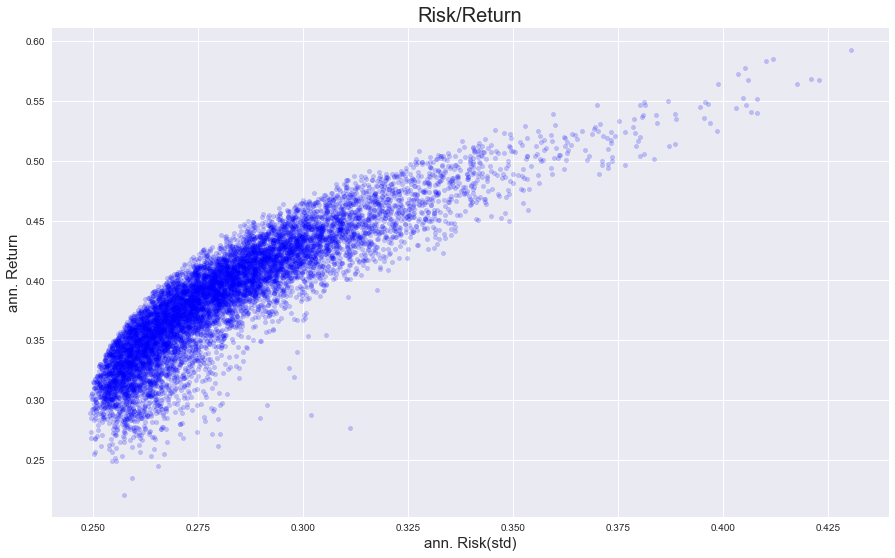

In [47]:
sim_return_and_risk.plot('Risk', 'Return', kind='scatter', color='blue', alpha=0.2, figsize = (15, 9))
plt.xlabel('ann. Risk(std)', fontsize = 15)
plt.ylabel('ann. Return', fontsize = 15)
plt.title('Risk/Return', fontsize = 20);

The points on the efficient frontier are the most effective investment portfolios.

## 2. The Minimum Risk Portfolio

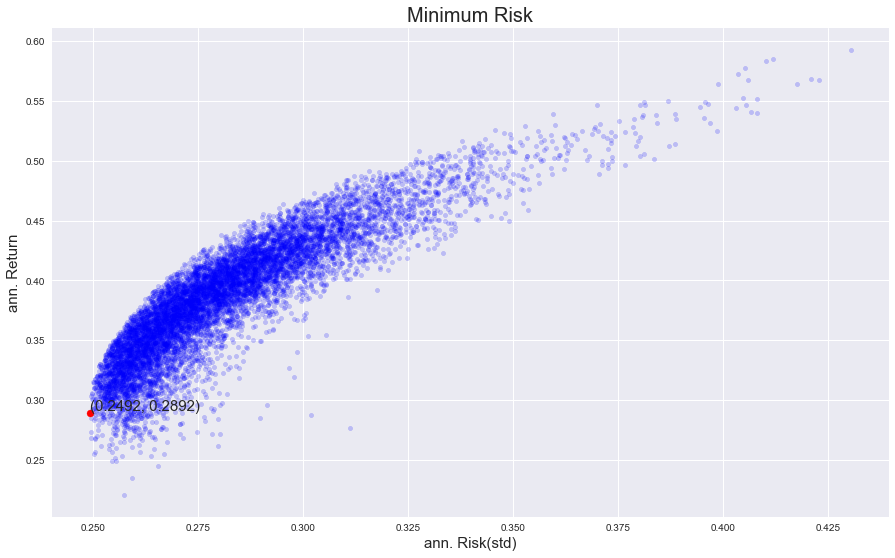

In [48]:
# find the index of the minimum of standard deviation
min_index = sim_return_and_risk['Risk'].idxmin()
 
sim_return_and_risk.plot('Risk', 'Return', kind='scatter', color='blue', alpha=0.2, figsize = (15, 9))
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title('Minimum Risk', fontsize = 20)
x = sim_return_and_risk.loc[min_index, 'Risk']
y = sim_return_and_risk.loc[min_index,'Return']
plt.scatter(x, y, color='red')

plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=15);

In [99]:
min_risk = sim_return_and_risk.iloc[min_index]
min_risk

Return   0.2892
Risk     0.2492
Sharpe   1.1606
Name: 1956, dtype: float64

In [100]:
# the weights of the minimum risk portfolio
min_risk_weight = weights[min_index]
min_risk_weight

array([0.23630013, 0.14238776, 0.06813164, 0.52160648, 0.03157398])

In [101]:
pd.DataFrame(index=stocks.columns, data={'Weights':min_risk_weight})

,Weights
AAPL,0.2363
AMZN,0.1424
FB,0.0681
GOOGL,0.5216
TSLA,0.0316


## 3. The Maxmum Return Portfolio

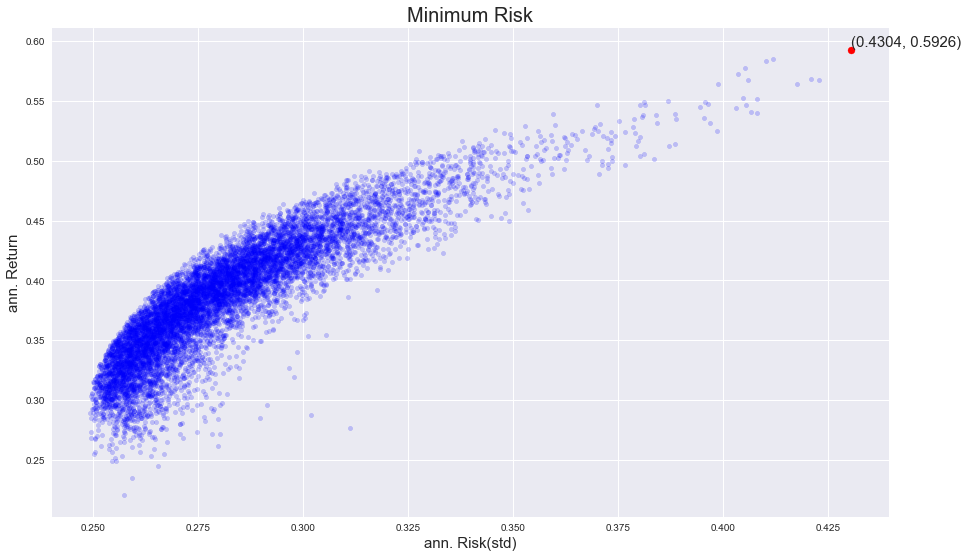

In [52]:
# find the index of the maxmum of standard deviation
max_index = sim_return_and_risk['Return'].idxmax()
 
sim_return_and_risk.plot('Risk', 'Return', kind='scatter', color='blue', alpha=0.2, figsize = (15, 9))
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title('Minimum Risk', fontsize = 20)
x = sim_return_and_risk.loc[max_index, 'Risk']
y = sim_return_and_risk.loc[max_index,'Return']
plt.scatter(x, y, color='red')

plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=15);

In [95]:
max_return = sim_return_and_risk.iloc[max_index]
max_return

Return   0.5926
Risk     0.4304
Sharpe   1.3770
Name: 2741, dtype: float64

In [97]:
# the weights of the minimum risk portfolio
max_return_weight = weights[max_index]
max_return_weight

array([0.12166025, 0.11413945, 0.08979786, 0.00679673, 0.6676057 ])

In [98]:
pd.DataFrame(index=stocks.columns, data={'Weights':max_return_weight})

,Weights
AAPL,0.1217
AMZN,0.1141
FB,0.0898
GOOGL,0.0068
TSLA,0.6676


## 4. The Optimal Portfolio (Max Sharpe Ratio Portfolio)

In fact, we want to find a balance between profit and risk, and Sharpe ratio can choose a optimal portfolio in MCMC simulations since it can claculate the excess return for each unit of risk taken.

### Portfolio Analysis with the Sharpe Ratio

\begin{equation}
    SharpeRatio = \frac{Return - RiskFree}{Risk}
\end{equation}

In [56]:
return_and_risk_s = return_and_risk[0:5]
return_and_risk_s

,Return,Risk
AAPL,0.3869,0.3019
AMZN,0.3749,0.3033
FB,0.2508,0.3296
GOOGL,0.2006,0.2635
TSLA,0.7173,0.5781


In [64]:
# set up risk-free return rate as 0
RiskFree = 0

# calculate the sharpe ratio for each stock
return_and_risk_s['Sharpe'] = (return_and_risk['Return'] - RiskFree) / return_and_risk['Risk']
return_and_risk_s

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Return,Risk,Sharpe
AAPL,0.3869,0.3019,1.2816
AMZN,0.3749,0.3033,1.2361
FB,0.2508,0.3296,0.7611
GOOGL,0.2006,0.2635,0.7615
TSLA,0.7173,0.5781,1.2408


In [58]:
sim_return_and_risk.head()

,Return,Risk
0,0.4275,0.2933
1,0.3649,0.2663
2,0.4133,0.2818
3,0.4103,0.2833
4,0.3914,0.2754


In [59]:
# calculate the sharpe ratio for each portfolio
sim_return_and_risk['Sharpe'] = (sim_return_and_risk['Return'] - RiskFree) / sim_return_and_risk['Risk']
sim_return_and_risk.head()

,Return,Risk,Sharpe
0,0.4275,0.2933,1.4577
1,0.3649,0.2663,1.3705
2,0.4133,0.2818,1.4665
3,0.4103,0.2833,1.4484
4,0.3914,0.2754,1.4215


In [61]:
sim_return_and_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Return  10000 non-null  float64
 1   Risk    10000 non-null  float64
 2   Sharpe  10000 non-null  float64
dtypes: float64(3)
memory usage: 632.5 KB


In [62]:
sim_return_and_risk.describe()

,Return,Risk,Sharpe
count,10000.0000,10000.0000,10000.0000
mean,0.3864,0.2820,1.3666
std,0.0506,0.0228,0.0998
min,0.2212,0.2492,0.8591
25%,0.3497,0.2650,1.3122
50%,0.3873,0.2772,1.3835
75%,0.4204,0.2937,1.4371
max,0.5926,0.4304,1.5705


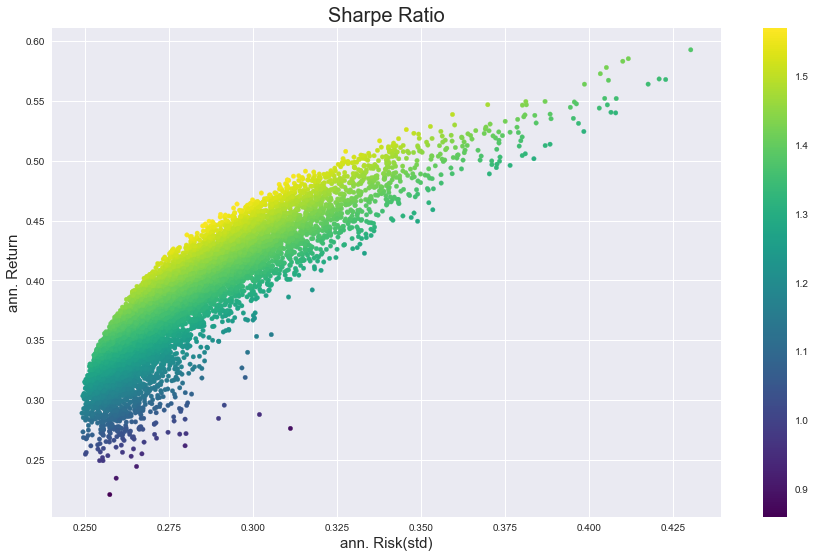

In [88]:
plt.figure(figsize = (15, 9))
plt.scatter(sim_return_and_risk['Risk'], sim_return_and_risk['Return'], s= 20, 
            c = sim_return_and_risk['Sharpe'], cmap='viridis')
plt.colorbar()
plt.xlabel('ann. Risk(std)', fontsize = 15)
plt.ylabel('ann. Return', fontsize = 15)
plt.title('Sharpe Ratio', fontsize = 20);

### The Max Sharpe Ratio Portfolio

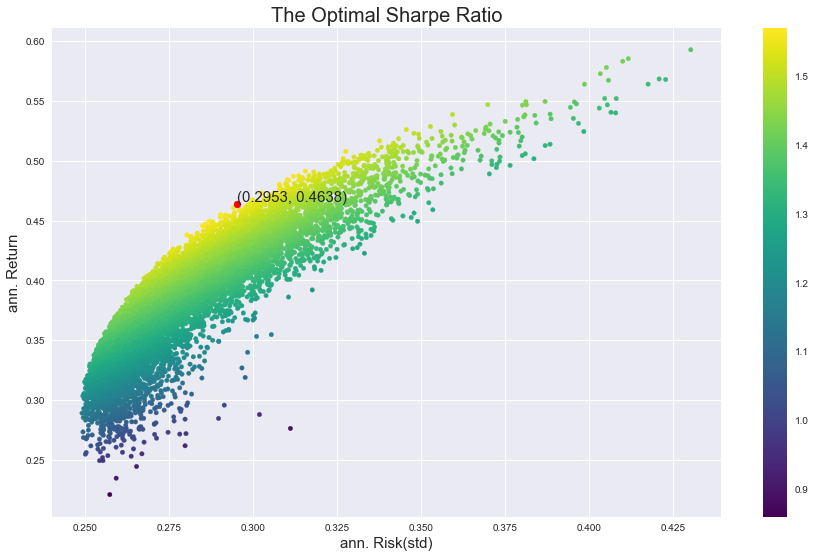

In [92]:
# find the index of the biggest sharpe ratio
sharpe_max_index = sim_return_and_risk['Sharpe'].idxmax()

plt.figure(figsize = (15, 9))
plt.scatter(sim_return_and_risk['Risk'], sim_return_and_risk['Return'], s= 20, 
            c = sim_return_and_risk['Sharpe'], cmap='viridis')
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title('The Optimal Sharpe Ratio', fontsize = 20)
x = sim_return_and_risk.loc[sharpe_max_index,'Risk']
y = sim_return_and_risk.loc[sharpe_max_index,'Return']
plt.scatter(x, y, color='red')

plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=15);

In [93]:
max_sharpe = sim_return_and_risk.iloc[sharpe_max_index]
max_sharpe

Return   0.4638
Risk     0.2953
Sharpe   1.5705
Name: 4178, dtype: float64

In [106]:
max_sharpe_weight = weights[sharpe_max_index]
max_sharpe_weight

array([0.3638368 , 0.33772774, 0.03085544, 0.00627346, 0.26130656])

### Outcome

In [108]:
pd.DataFrame(index=stocks.columns, data={'weights' : max_sharpe_weight})

,weights
AAPL,0.3638
AMZN,0.3377
FB,0.0309
GOOGL,0.0063
TSLA,0.2613
